In this project, our goal is to build an MLP on the mnsit dataset that will give us approximalty 98% accuracy



```

```

Loading the dataset

In [ ]:
import tensorflow as tf

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_train,X_valid = X_train_full[5000:]/255.,X_train_full[:5000]/255.
y_train,y_valid = y_train_full[5000:],y_train_full[:5000]
X_test = X_test/255.

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

labels are the classs ID's, from 0 to 9

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [ ]:
class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [ ]:
import numpy as np

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(300,activation="relu"),
        tf.keras.layers.Dense(100,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
    ]

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
exponent_lr = ExponentialLearningRate(factor=1.005)

now lets train our model for 1 epoch

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exponent_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5288 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

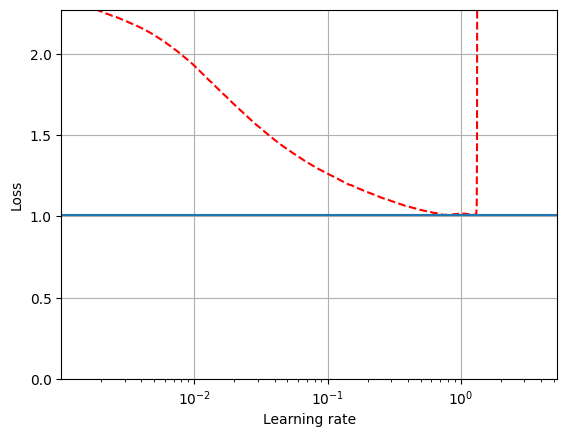

In [ ]:
plt.plot(exponent_lr.rates, exponent_lr.losses,'r--')
plt.gca().set_xscale('log')
plt.hlines(min(exponent_lr.losses), min(exponent_lr.rates), max(exponent_lr.rates))
plt.axis([min(exponent_lr.rates), max(exponent_lr.rates), 0, exponent_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),
          callbacks=[early_stopping,checkpoint_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8699 - loss: 0.4075 - val_accuracy: 0.9712 - val_loss: 0.1000
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9701 - loss: 0.0985 - val_accuracy: 0.9742 - val_loss: 0.0827
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9811 - loss: 0.0633 - val_accuracy: 0.9742 - val_loss: 0.0876
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9855 - loss: 0.0451 - val_accuracy: 0.9768 - val_loss: 0.0858
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9734 - val_loss: 0.1065
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9916 - loss: 0.0272 - val_accuracy: 0.9774 - val_loss: 0.0989
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.9738 - val_loss: 0.1167
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9946 - los

Now let's rollback to best model

In [ ]:
best_model = tf.keras.models.load_model("my_mnist_model.keras")
best_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1016


[0.08337438106536865, 0.9747999906539917]

*We got over 98% accuracy!*

Now we will do hyperparametering not only to the learning rate, but all the params, using keras tuner, and we will see if we can acheive a better results

In [ ]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt


In [ ]:
def build_model(hp):
    # Define the hyperparameters
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate",
                             min_value=1e-4,
                             max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

    # Set the optimizer based on the chosen type
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Build the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

    # Add the specified number of hidden layers
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    # Compile the model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    return model


In [ ]:
random_search_tuner = kt.RandomSearch(
        build_model, objective="val_accuracy", max_trials=5, overwrite=True,
        directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,
                               validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 02s]
val_accuracy: 0.8184000253677368

Best val_accuracy So Far: 0.9643999934196472
Total elapsed time: 00h 05m 20s


In [ ]:
top_models = random_search_tuner.get_best_models(num_models=1)
new_best_model = top_models[0]  # Take the best model

# Evaluate it on the test set
test_loss, test_accuracy = new_best_model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1459
Test accuracy: 0.9606000185012817


Oh no, we got less accuracy, 0.9606000185012817 compared to 0.9747999906539917, maybe we will try increasing the number of trials, and see

In [ ]:
random_search_tuner = kt.RandomSearch(
        build_model, objective="val_accuracy", max_trials=10, overwrite=False,
        directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,
                               validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 01m 36s]
val_accuracy: 0.9666000008583069

Best val_accuracy So Far: 0.9757999777793884
Total elapsed time: 00h 24m 23s


In [ ]:
top_models = random_search_tuner.get_best_models(num_models=1)
new_best_model = top_models[0]  # Take the best model

# Evaluate it on the test set
test_loss, test_accuracy = new_best_model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1270
Test accuracy: 0.9761999845504761


good, by increasing the max_trials, the algorithm got 0.9761999845504761 of accuracy!

for the last time, lets also increase the max_trials, maybe we can even reach 98%!! lets try

In [ ]:
random_search_tuner = kt.RandomSearch(
        build_model, objective="val_accuracy", max_trials=20, overwrite=False,
        directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,
                               validation_data=(X_valid, y_valid))

Trial 20 Complete [00h 02m 54s]
val_accuracy: 0.9312000274658203

Best val_accuracy So Far: 0.9757999777793884
Total elapsed time: 01h 09m 08s


In [ ]:
top_models = random_search_tuner.get_best_models(num_models=1)
new_best_model = top_models[0]  # Take the best model

# Evaluate it on the test set
test_loss, test_accuracy = new_best_model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1270
Test accuracy: 0.9761999845504761


hh, best acheived: 0.9761999845504761